In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

### Load Data

In [2]:
data = pd.read_csv("credit_card_clustering.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


 Exploratory Data Profiling/Analysis

In [4]:
#report = pp.ProfileReport(data)

In [5]:
#report.to_file('CreditcardData.html')

### How many rows/columns are there?

In [6]:
data.shape

(8950, 18)

### How many customers are there?

In [7]:
data['CREDIT_LIMIT'].nunique()


205

### How does the balance distribution of our customers look like?

Descriptive Statistics

In [8]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

The annual income ranges from 0 to 19043 with an average (median) balance is 873.

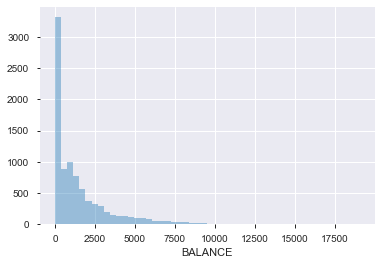

In [9]:
sns.distplot(data['BALANCE'], kde=False)

### How does the payments distribution look like?

In [10]:
data['PAYMENTS'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
10%        179.617069
20%        313.141031
30%        459.438287
40%        624.268198
50%        856.901546
60%       1185.259270
70%       1604.092113
80%       2314.017654
90%       3923.906642
max      50721.483360
Name: PAYMENTS, dtype: float64

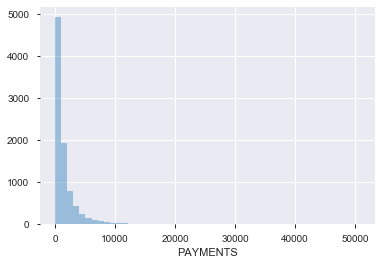

In [11]:
sns.distplot(data['PAYMENTS'], kde=False)

### How does the puchases distribution look like?

In [12]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

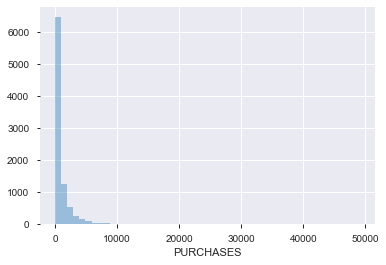

In [13]:
sns.distplot(data['PURCHASES'], kde=False)

### How does credit limit purchase looks like?

In [14]:
data['CREDIT_LIMIT'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      4494.282473
std       3638.646702
min         50.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [15]:
data['CREDIT_LIMIT'].fillna(3000,inplace=True) #Missing value insert median value

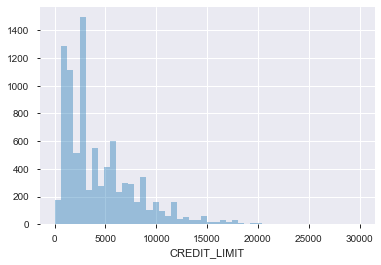

In [16]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

# Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
# Get features we need
features = ['BALANCE','PAYMENTS', 'PURCHASES', 'CREDIT_LIMIT']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_raw)
# X_raw.head()

X.head()

,BALANCE,PAYMENTS,PURCHASES,CREDIT_LIMIT
0,40.900749,201.802084,95.40,1000.0
1,3202.467416,4103.032597,0.00,7000.0
2,2495.148862,622.066742,773.17,7500.0
3,1666.670542,0.000000,1499.00,7500.0
4,817.714335,678.334763,16.00,1200.0


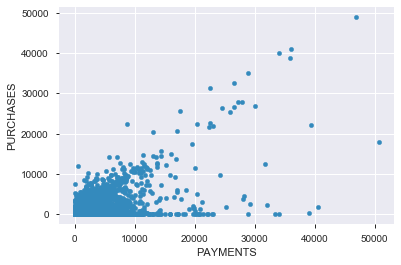

In [19]:
# If you have 2 features, you can plot it on a 2D scatter plot
X.plot.scatter('PAYMENTS', 'PURCHASES')

### Perform Agglomerative Clustering*

In [20]:
# Clustering using AGC
agc = AgglomerativeClustering()

# Fit data to model
agc.fit(X)

# Get labels
labels = agc.labels_

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [21]:
new_data.head()

,BALANCE,PAYMENTS,PURCHASES,CREDIT_LIMIT,labels
0,40.900749,201.802084,95.40,1000.0,1
1,3202.467416,4103.032597,0.00,7000.0,0
2,2495.148862,622.066742,773.17,7500.0,0
3,1666.670542,0.000000,1499.00,7500.0,0
4,817.714335,678.334763,16.00,1200.0,1


In [22]:
new_data.labels.value_counts()

1    5608
0    3342
Name: labels, dtype: int64

### PLOT DENDOGRAM

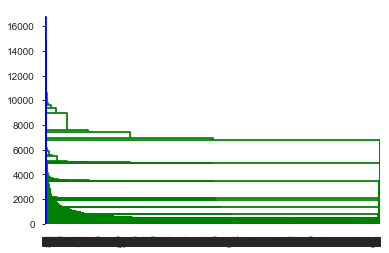

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Get Linkages
Z = linkage(X)

# Plot Dendogram
dendrogram(Z);  

### Plot Centers and labels

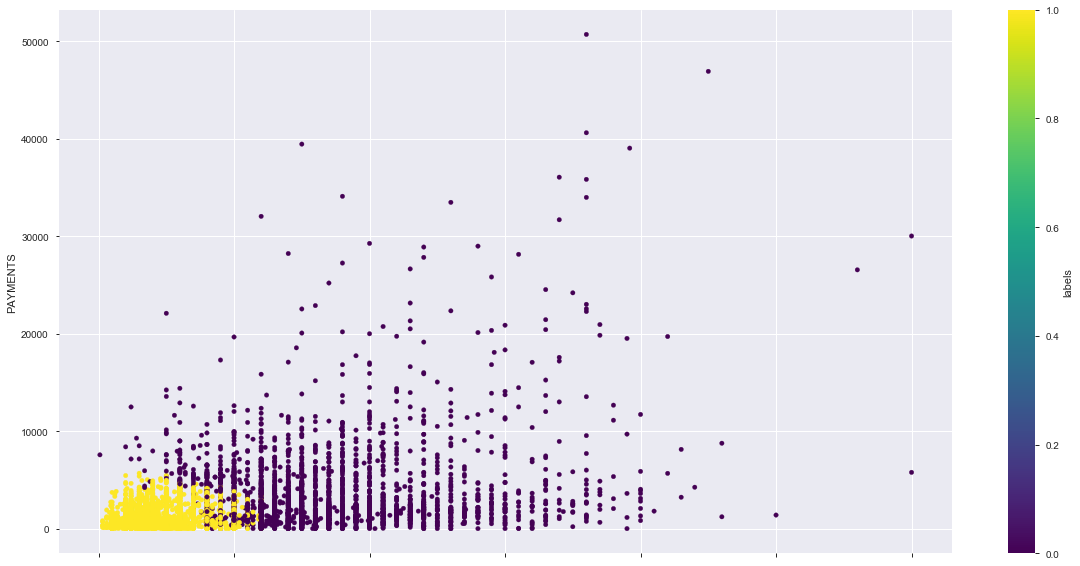

In [24]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='CREDIT_LIMIT', 
                      y='PAYMENTS', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))


# Deep Dive to each cluster

In [25]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,BALANCE,PAYMENTS,PURCHASES,CREDIT_LIMIT,labels
count,3342.000000,3342.000000,3342.000000,3342.000000,3342.0
mean,2884.413955,3151.076314,1757.142133,8184.702501,0.0
std,2791.304555,4226.626696,3226.141253,3365.249214,0.0
min,0.000000,0.000000,0.000000,50.000000,0.0
25%,393.106383,903.643817,66.700000,6000.000000,0.0
50%,2361.850844,1690.157866,683.655000,7500.000000,0.0
75%,4479.217457,3882.167017,2140.472500,10000.000000,0.0
max,19043.138560,50721.483360,49039.570000,30000.000000,0.0


Cluster 0: 

In [26]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,BALANCE,PAYMENTS,PURCHASES,CREDIT_LIMIT,labels
count,5608.000000,5608.000000,5608.000000,5608.000000,5608.0
mean,777.877723,888.149150,553.907677,2295.034303,1.0
std,784.476778,905.448292,737.444381,1194.966309,0.0
min,0.000000,0.000000,0.000000,150.000000,1.0
25%,73.167586,284.906350,31.437500,1200.000000,1.0
50%,536.924572,557.755967,275.635000,2000.000000,1.0
75%,1267.060925,1188.091290,750.337500,3000.000000,1.0
max,3830.916541,5679.950642,4793.350000,6000.000000,1.0


Cluster 1: 